In [4]:
import torch
import torchaudio
import torchaudio.functional as F
# functional implements features as standalone features
import torchaudio.transforms as T
# transforms implements features as objects

print(torch.__version__)
print(torchaudio.__version__)

import librosa
import matplotlib.pyplot as plt

2.2.0+cu118
2.2.0+cu118


In [20]:
from IPython.display import Audio
from matplotlib.patches import Rectangle
from torchaudio.utils import download_asset

SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)

def plot_spectrogram(specgram, title=None, ylabel="freq_in", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")

def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")

def plot_pitch(waveform, sr, pitch):
    figure, axis = plt.subplots(1, 1)
    axis.set_title("Pitch Feature")
    axis.grid(True)

    end_time = waveform.shape[1] / sr
    time_axis = torch.linspace(0, end_time, waveform.shape[1])
    axis.plot(time_axis, waveform[0], linewidth =1, color="gray", alpha=0.3)

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, pitch.shape[1])
    axis2.plot(time_axis, pitch[0], linewidth=2, label="Pitch", color="green")
    axis2.legend(loc=0)


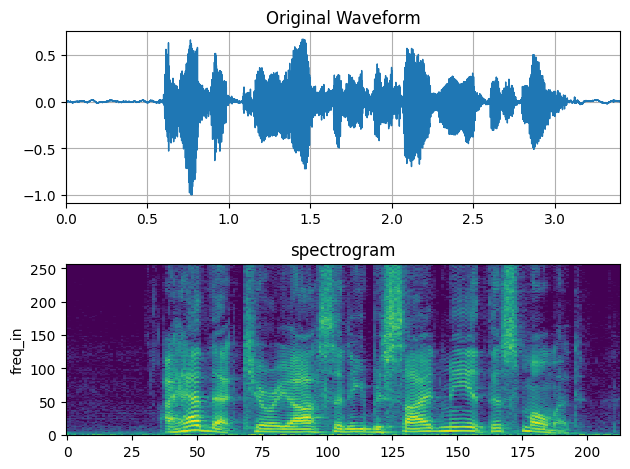

In [11]:
SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_SPEECH)
spectrogram = T.Spectrogram(n_fft=512)
spec = spectrogram(SPEECH_WAVEFORM)

fig, axs = plt.subplots(2, 1)
plot_waveform(SPEECH_WAVEFORM, SAMPLE_RATE, title="Original Waveform", ax=axs[0])
plot_spectrogram(spec[0], title="spectrogram", ax=axs[1])
fig.tight_layout()

In [12]:
Audio(SPEECH_WAVEFORM.numpy(), rate=SAMPLE_RATE)

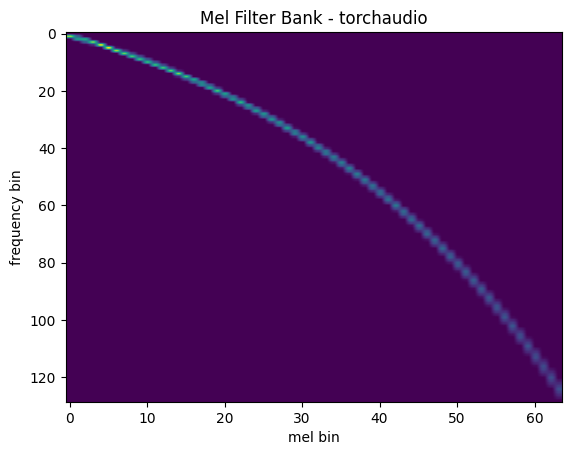

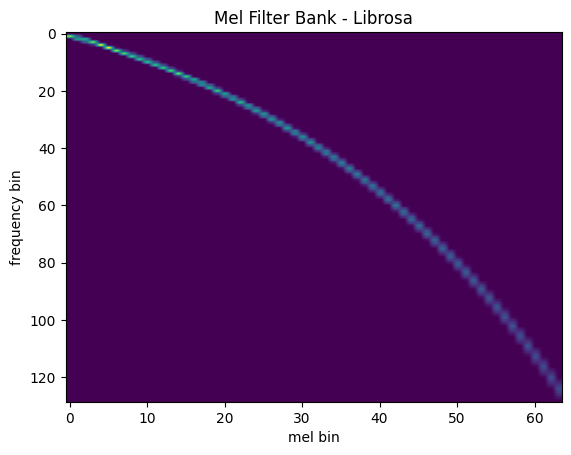

In [15]:
n_fft = 256
n_mels = 64
sample_rate = 6000

mel_filters = F.melscale_fbanks(
    int(n_fft // 2 + 1),
    n_mels = n_mels,
    f_min = 0.0,
    f_max = sample_rate / 2.0,
    sample_rate = sample_rate,
    norm="slaney"
)

mel_filters_librosa = librosa.filters.mel(
    sr=sample_rate,
    n_fft = n_fft,
    n_mels = n_mels,
    fmin = 0.0,
    fmax=sample_rate / 2.0,
    norm="slaney",
    htk=True
).T

plot_fbank(mel_filters, "Mel Filter Bank - torchaudio")
plot_fbank(mel_filters_librosa, "Mel Filter Bank - Librosa")

In [18]:
mse = torch.square(mel_filters - mel_filters_librosa).mean().item()
print("Mean Squared Difference", mse)

Mean Squared Difference 3.924735763781171e-17


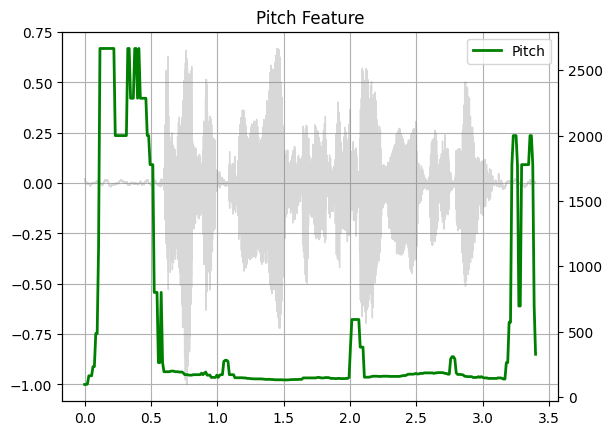

In [21]:
pitch = F.detect_pitch_frequency(SPEECH_WAVEFORM, SAMPLE_RATE)
plot_pitch(SPEECH_WAVEFORM, SAMPLE_RATE, pitch)